In [1]:
# Import all libraries needed for the tutorial
#Numpy sẽ được sử dụng để giúp tạo tập dữ liệu mẫu
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
Pandas version 1.1.4
Matplotlib version 3.2.2


In [3]:
# The inital set of baby names
names = ['Bob','Jessica','Mary','John','Mel']

In [4]:
# This will ensure the random samples below can be reproduced. 
# This means the random samples will always be identical.

random.seed?

In [5]:
random.randint?

In [6]:
len?

In [7]:
range?

In [8]:
zip?

In [9]:
random.seed(500)
random_names = [names[random.randint(low=0,high=len(names))] for i in range(1000)]

# Print first 10 records
random_names[:10]

['Mary',
 'Jessica',
 'Jessica',
 'Bob',
 'Jessica',
 'Jessica',
 'Jessica',
 'Mary',
 'Mary',
 'Mary']

In [10]:
#Tạo một số ngẫu nhiên từ 0 đến 1000
births = [random.randint(low=0,high=1000) for i in range(1000)]
births[:10]

[968, 155, 77, 578, 973, 124, 155, 403, 199, 191]

In [11]:
#Hợp nhất tên và tập dữ liệu sinh bằng hàm zip.
BabyDataSet = list(zip(random_names,births))
BabyDataSet[:10]

[('Mary', 968),
 ('Jessica', 155),
 ('Jessica', 77),
 ('Bob', 578),
 ('Jessica', 973),
 ('Jessica', 124),
 ('Jessica', 155),
 ('Mary', 403),
 ('Mary', 199),
 ('Mary', 191)]

In [12]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df[:10]

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973
5,Jessica,124
6,Jessica,155
7,Mary,403
8,Mary,199
9,Mary,191


In [13]:
df.to_csv?

In [14]:
df.to_csv('births1880.txt',index=False,header=False)

In [15]:
pd.read_csv?

In [16]:
Location = r'/content/births1880.txt'
df = pd.read_csv(Location)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mary    999 non-null    object
 1   968     999 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [18]:
#Để thực sự xem nội dung của khung dữ liệu, chúng ta có thể sử dụng hàm head () theo mặc định sẽ trả về năm bản ghi đầu tiên
df.head()

,Mary,968
0,Jessica,155
1,Jessica,77
2,Bob,578
3,Jessica,973
4,Jessica,124


In [19]:
df = pd.read_csv(Location, header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [20]:
#xem 5 bản ghi cuối của khung dữ liệu
df.tail()

,0,1
995,John,151
996,Jessica,511
997,John,756
998,Jessica,294
999,John,152


In [21]:
#Nếu chúng ta muốn đặt tên cụ thể cho các cột, chúng ta sẽ phải chuyển một tham số khác được gọi là tên. Chúng ta cũng có thể bỏ qua tham số tiêu đề.
df = pd.read_csv(Location, names=['Names','Births'])
df.head(5)

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973


In [22]:
#Xóa tệp txt đã sử dụng xong
import os
os.remove(Location)

In [23]:
#sử dụng thuộc tính duy nhất của khung dữ liệu để tìm tất cả các bản ghi duy nhất của cột "Tên".
df['Names'].unique()

array(['Mary', 'Jessica', 'Bob', 'John', 'Mel'], dtype=object)

In [24]:
#In các giá trị duy nhất
for x in df['Names'].unique():
    print(x)

Mary
Jessica
Bob
John
Mel


In [25]:
print(df['Names'].describe())

count     1000
unique       5
top        Bob
freq       206
Name: Names, dtype: object


In [26]:
df.groupby?

In [27]:
# tạo đối tượng theo nhóm
name = df.groupby('Names')

# Áp dụng hàm sum cho đối tượng theo nhóm
df = name.sum()
df

,Births
Names,
Bob,106817
Jessica,97826
John,90705
Mary,99438
Mel,102319


In [29]:
#Để tìm tên phổ biến nhất hoặc tên trẻ có tỷ lệ sinh cao nhất, chúng ta có thể thực hiện một trong các thao tác sau.

#Sắp xếp khung dữ liệu và chọn hàng trên cùng
#Sử dụng thuộc tính max () để tìm giá trị lớn nhất
# Method 1:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

,Births
Names,
Bob,106817


In [30]:
# Method 2:
df['Births'].max()

106817

The most popular name


,Births
Names,
Bob,106817
Mel,102319
Mary,99438
Jessica,97826
John,90705


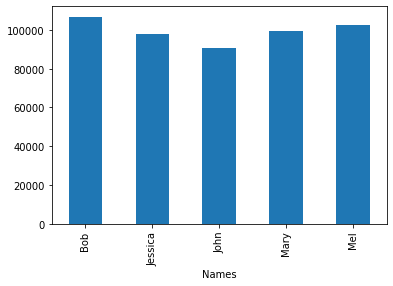

In [31]:
# Tạo đồ thị
df['Births'].plot.bar()

print("The most popular name")
df.sort_values(by='Births', ascending=False)